<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Caso_01_Regresion_lineal_simple_volumen_peso_paquetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Construir y evaluar un modelo de regresión lineal simple con dos variables numéricas que definen una variable independiente y otra variable dependiente.

Para este caso se carga un conjunto de datos con valores numéricos de:

* *Volumen_Paquete_cm3* como variable independiente y
* *Peso_Paquete_kg* como variable dependiente.


# Descripción

* Cargar librerías.
* Crear funciones.
* Cargar datos.
* Análisis descriptivo exploratorio.
  * Visualizar datos.
    * Histograma.
    * Diagrama de caja.
    * Dispersión de los datos.
*  Crear modelo de regresión lineal simple.
  * Identificar métricas *r square* con valor por encima del $50$% para aceptar el modelo y de *RMSE* cercano a 0 que deberá ser comparado con otro modelo de regresión.
  * Partir en datos de entrenamiento y datos de validación con el $80$% y $20$%.
  * Evaluar modelo con datos de entrenamiento con el valor *r square*.
  * Visualizar recta de regresión con el modelo construído y los datos de entrenamiento.
  * Realizar predicciones utilizando el modelo con los datos de validación.
  * Evaluar el modelo con el estadístico RMSE *root mean square error*
* Interpretar el caso.


# Dearrollo

## Cargar librerías


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter as Counter
import math
from sklearn.linear_model import LinearRegression # Para contruir el modelo

import matplotlib.pyplot as plt # Para visualizar datos
from sklearn.model_selection import train_test_split # Para partir los datos

from sklearn import metrics # Para determinar métricas.



## Crear funciones

Se crean funciones personalizadas útiles el desarrollo del caso.


In [ ]:
# Esta función regresa los datos en formato csv cargados en memoria RAM
def f_cargar_datos(ruta):
  # Cargar datos de la carpeta sample_data
  # datos = pd.read_csv('sample_data/estaturas_pesos.csv')

  # cargar datos de github.com enlace en la nube internet
  datos = pd.read_csv(ruta)
  return datos

# Función que devuelve estad´siticos de una variable numérica
def f_media_moda_mediana_n(datos):
  # Calcular la media aritmética
  media = np.mean(datos)

  # Calcular la moda
  contador = Counter(datos)
  moda = contador.most_common(1)[0][0]

  # Calcular la mediana
  mediana = np.median(datos)

  # ¿Cuántos nnpúmeros son?
  n = len(datos)
  return media, moda, mediana, n

# Función que devuelve las medias aritméticas y desviaciones estándar de dos variables numéricas de una muestra
def f_medias (independiente, dependiente):
  medias = [np.mean(independiente), np.mean(dependiente)]
  return medias

# Función que devuelve las desviaciones estándar de dos variables numéricas de una muestra
def f_desviaciones_std (independiente, dependiente):
  desviaciones = [np.std(independiente, ddof=1), np.std(dependiente, ddof=1)]
  return desviaciones

# Función que devuelve la covariana y correlación de Pearson y r square de dos variables numéricas de una muestra
def f_cov_corr(independiente, dependiente):
  covar = np.cov(independiente, dependiente, ddof=1)[0,1]
  r = np.corrcoef(independiente, dependiente)[0,1]
  r_square = r ** 2
  return covar, r, r_square


# Función que construye diagrama de dispersión
def f_dispersion (x, y, x_nombre, y_nombre):
  medias = f_medias(x, y)

  cova, r, r_square = f_cov_corr(x, y)   # Crear el diagrama de dispersión
  plt.scatter(x, y, s = 5)

  # Etiquetas y título
  plt.xlabel(x_nombre)
  plt.ylabel(y_nombre)
  plt.title(print('Diagrama de Dispersión. Corr Pearson'))

  plt.axvline(x=medias[0], color='blue', linestyle='--', linewidth=0.5,
            label="Media "+ x_nombre + ":" + str(np.round(medias[0], 2)))
  plt.axhline(y=medias[1], color='green', linestyle='--', linewidth=0.5,
            label="Media "+ y_nombre+":" + str(np.round(medias[1], 2)))
  plt.legend()

  # Subtítulo debajo del gráfico
  plt.figtext(0.5, -0.05, f'R Pearson: {np.round(r, 4)}', ha='center', fontsize=10)

  # Mostrar el diagrama de dispersión
  plt.show()

# función que visualiza histograma de una variable numérica en estructira tipo lista
# Re Utiliza la función f_media_moda_mediana_n
def f_histograma(datos, contexto):
  min = np.min(datos)
  max = np.max(datos)

  # Convertir a enteros
  min= int(min)
  max = int(max)

  # Calcular el número óptimo de clases usando la regla de Sturges
  n = len(datos)
  k = int(round(1 + math.log2(n)))

  plt.hist(datos, bins=range(min, max, k), edgecolor="black")
  plt.xlabel(contexto)

  media, moda, mediana, N = f_media_moda_mediana_n(datos)

  # Agregar líneas punteadas roja, azul y verde para representar media, mediana y moda
  medias = f_media_moda_mediana_n(datos)
  plt.axvline(x=media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
  plt.axvline(x=mediana, color='blue', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
  plt.axvline(x=moda, color='yellow', linestyle='--', linewidth=2, label=f'Moda: {moda:.2f}')

  plt.ylabel("Frecuencia")
  plt.title("Distribución de los datos: "+contexto)

  plt.legend()
  plt.grid(False)
  plt.show()

# Calcula los cuartiles
def f_cuartiles_quantile(datos):
  q1 = np.percentile(datos, 25)
  q2 = np.percentile(datos, 50)
  q3 = np.percentile(datos, 75)
  return q1, q2, q3

# Visualiza diagrama de caja para indentificar datos extremos
def f_diagrama_caja (datos, contexto):
  plt.boxplot(datos, vert=False)
  plt.xlabel(contexto)
  plt.ylabel('Valor')
  plt.title('Diagrama de Caja')

  # Calculando cuartiles d ela funci´pn previamente creada
  q1, q2, q3= f_cuartiles_quantile(datos)
  # Añadir leyendas para los cuartiles
  plt.axvline(x=q1, color='blue', linestyle='--', linewidth=1, label=f'Q1: {q1:.2f}')
  plt.axvline(x=q2, color='blue', linestyle='--', linewidth=1, label=f'Q2:Mediana: {q2:.2f}')
  plt.axvline(x=q3, color='blue', linestyle='--', linewidth=1, label=f'Q3: {q3:.2f}')

  # Añadir leyenda adicional
  plt.legend()

  plt.show()


# función que visualzia la recta de regesi,ón
# Graficar los datos y la regresión lineal
def f_regresion_linea_tendencia(modelo, x, y, x_nombre, y_nombre):
  # Graficar los datos y la regresión lineal
  plt.scatter(x, y, color='blue', s=5)
  a = modelo.intercept_  # El alor de la intersección de la abcisa
  b = modelo.coef_       # El valor de la pendiente

  # Datos de cova y correlacion con los valores de entrenamiento
  covar, r, r_square = f_cov_corr(x, y)

  # Líena de tendencia
  linea_tendencia = modelo.predict(x.reshape(-1, 1))
  plt.plot(x.reshape(-1, 1), linea_tendencia, color='red', linewidth=0.5,
           label=f'a = {np.round(a, 4)}; b = {np.round(b, 4)}; r={np.round(r, 4)}; r square = {np.round(r_square, 4)}')

  plt.xlabel(x_nombre)
  plt.ylabel(y_nombre)
  plt.title('Regresión Lineal Simple. Datos de Entrenamiento')
  plt.legend()
  plt.grid(True)



## Crear o cargar datos

Se cargan los datos de la ruta *url* indicada en donde están los datos en un formato de *archivo csv* que supone contiene dos variables numéricas en donde la primera variable o columna es la variable independiente y la segunda columna es la variable dependiente.

Ejemplo *Volumen_Paquete_cm3* como variable independiente y *pesos* como variable dependiente.


In [ ]:
# https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/refs/heads/main/datos/datos_paquetes_volumen_peso_alto_r2.csv
#
ruta = "https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/refs/heads/main/datos/datos_paquetes_volumen_peso_alto_r2.csv"
datos = f_cargar_datos(ruta)

print(datos)




     Volumen_Paquete_cm3  Peso_Paquete_kg
0              54.967142        26.617744
1              48.617357        28.994026
2              56.476885        23.590754
3              65.230299        28.906966
4              47.658466        20.063387
..                   ...              ...
495            55.389100        23.155640
496            39.627538        24.839448
497            48.096613        22.442860
498            41.243817        17.497527
499            36.172003        17.331715

[500 rows x 2 columns]


## Crear o cargar datos

Se cargan los datos de la ruta *url* indicada en donde están los datos en un formato de *archivo csv* que supone contiene dos variables numéricas en donde la primera variable o columna es la variable independiente y la segunda columna es la variable dependiente.

Ejemplo *Volumen_Paquete_cm3* como variable independiente y *Peso_Paquete_kg* como variable dependiente.


Mostrar la estructura del conjunto de datos conla función *info()*.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Volumen_Paquete_cm3  500 non-null    float64
 1   Peso_Paquete_kg      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB



## Análisis descriptivo

Se presentan los estadísticos mas importantes de las variables de interés con la función *describe()*

* Se define independiente = *'Volumen_Paquete_cm3'*
* Se define dependiente = *'Peso_Paquete_kg'*

### Estadísticos

In [ ]:
# volumen y peso de paquetes
independiente = 'Volumen_Paquete_cm3'
dependiente = 'Peso_Paquete_kg'

datos[[independiente, dependiente]].describe()

,Volumen_Paquete_cm3,Peso_Paquete_kg
count,500.000000,500.000000
mean,50.068380,22.582585
std,9.812532,4.593545
min,17.587327,11.792315
25%,42.996926,19.229041
50%,50.127971,22.273932
75%,56.367833,24.900904
max,88.527315,43.893208


### Histograma

Histograma de las variables de interés volumen y pesos de paquetes.

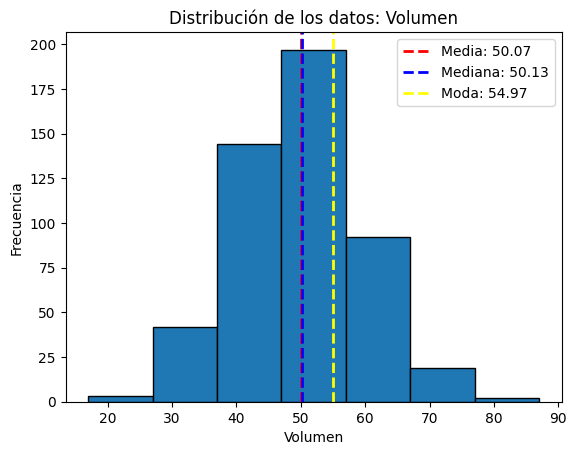

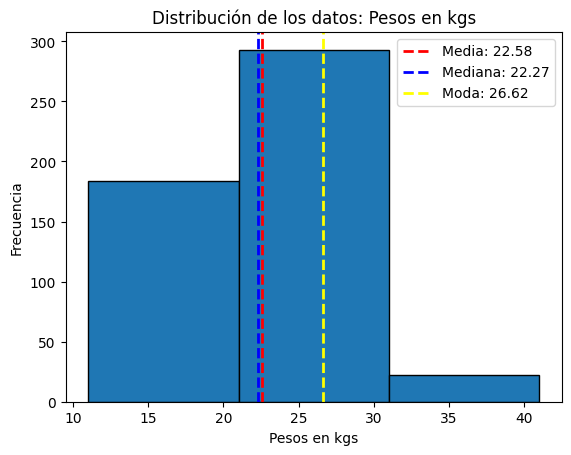

In [ ]:
f_histograma(datos[independiente], "Volumen")

f_histograma(datos[dependiente], "Pesos en kgs")


### Diagramas de caja

Se exploran los datos mediante el diagrama de caja de las variables de interés volumen y pesos para identifiar si hay valores atípicos.

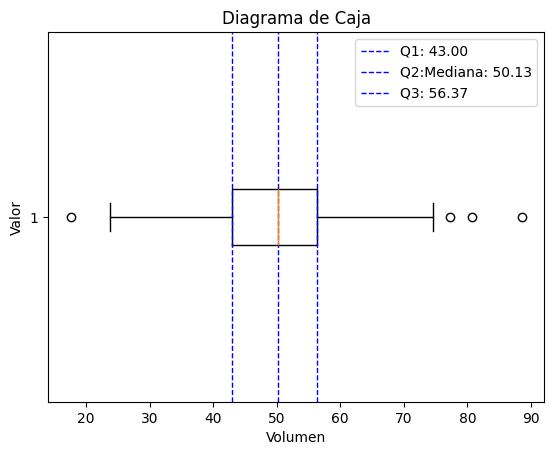

In [ ]:
f_diagrama_caja(datos[independiente], "Volumen")

Si hay valores atípicos en los valores de la variable volumen.

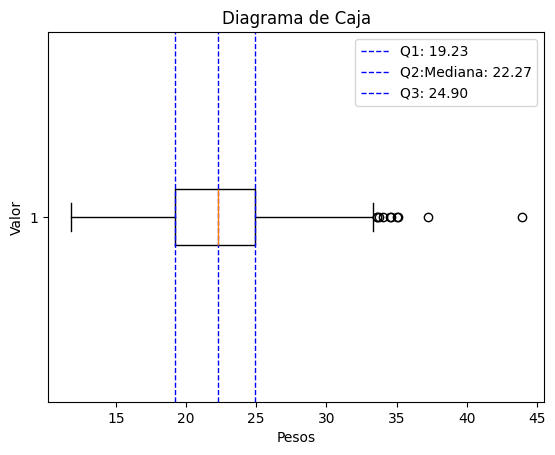

In [ ]:
f_diagrama_caja(datos[dependiente], "Pesos")

Existen valores atípicos en la variable pesos por encima de 35 o más kgs, es decir por encima de $Q3 + 1.5 \times RI$.

La pregunta es, ¿qué hacer con esos dato?, verificarlo y dejarlo o modificar su valor y transformarlo a un valor numéricos veraz, viable o verificable que puede ser el valor de la media aritmética o la mediana.

### Dispersión de los datos



Diagrama de Dispersión. Corr Pearson


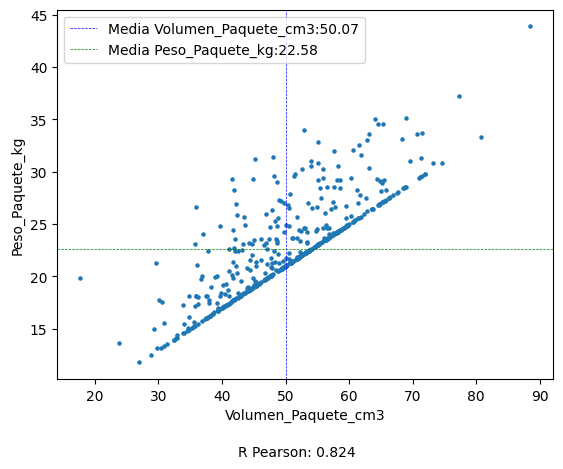

In [ ]:
f_dispersion(datos[independiente], datos[dependiente], independiente, dependiente)


La correlación *r* resultante de los datos de *estatura*  y *peso* fue de $0.7652$ que se interpreta como una correlación positiva fuerte.

## Crear modelo de regresión lineal simple.

### Preparar datos

Se extraen las variables volumen y pesos a tipo de datos listas numpy para facilitar su uso.

In [ ]:
v_independiente = datos[independiente].to_numpy()
v_dependiente = datos[dependiente].to_numpy()

print (v_independiente)
print(v_dependiente)




[54.96714153 48.61735699 56.47688538 65.23029856 47.65846625 47.65863043
 65.79212816 57.67434729 45.30525614 55.42560044 45.36582307 45.34270246
 52.41962272 30.86719755 32.75082167 44.37712471 39.8716888  53.14247333
 40.91975924 35.87696299 64.65648769 47.742237   50.67528205 35.75251814
 44.55617275 51.1092259  38.49006423 53.75698018 43.9936131  47.0830625
 43.98293388 68.52278185 49.86502775 39.42289071 58.22544912 37.7915635
 52.08863595 30.40329876 36.71813951 51.96861236 57.3846658  51.71368281
 48.84351718 46.98896304 35.2147801  42.80155792 45.39361229 60.57122226
 53.4361829  32.36959845 53.24083969 46.1491772  43.23078    56.11676289
 60.30999522 59.31280119 41.60782477 46.90787624 53.31263431 59.75545127
 45.20825762 48.14341023 38.93665026 38.03793376 58.12525822 63.56240029
 49.27989878 60.03532898 53.61636025 43.54880245 53.61395606 65.38036566
 49.64173961 65.64643656 23.80254896 58.21902504 50.87047068 47.0099265
 50.91760777 30.12431085 47.80328112 53.57112572 64.77

## Crear datos de entrenamiento y validación

* Los datos de entrenamiento serán aleatoriamente el 80% de los datos originales.
* Los datos de validación o prueba (test) serán aleatoriamente el complemento del 20%.
* Los datos de entrenamiento y datos de validación deben ser mutuamente excluyentes que signifia que están en un conjunto o están en el otro.

Ahora que se tiene la variable independiente volumen y la variable dependiente pesos, el siguiente paso es dividir estos datos en conjuntos de entrenamiento y otro de prueba o validación.

Se utiiza el método *train_test_split()* que forma parte de la librería *Scikit-Learn* para dividir los datos en entrenamiento y validación.

El argumento *test_size* establece el 20% para datos de validación por lo que el $80$% pertenece a los datos de entrenamiento y el resto a datos de validación o prueba.

El argumento 2025 significa semilla de aleatoriedad, pare reproducir los mismos resultaados aleatorios con el mismo conjunto de datos.

Se declaran las variable *v_independiente* y *v_dependiente* que contienen los valores de volumen y peso en formato numpy.


In [ ]:
# v_independiente y v_dependiente son los valores de volumen y peso en formato numpy

v_independiente = datos[independiente].to_numpy()
v_dependiente = datos[dependiente].to_numpy()

ind_train, ind_test, dep_train, dep_test = train_test_split(v_independiente, v_dependiente,
                                                                            test_size=0.20,
                                                                            random_state=2025)

# Crear un DataFrame con los datos de entrenamiento
datos_entrenamiento = pd.DataFrame({independiente: ind_train, dependiente: dep_train})

# Datos de entrenamiento
print ("Datos de entrenamiento")
print(datos_entrenamiento)

# Crear un DataFrame con los datos de validación o test
datos_validacion = pd.DataFrame({independiente: dep_test, dependiente: dep_test})


# Datos de validación
print()
print ("Datos de validación")
print(datos_validacion)



Datos de entrenamiento
     Volumen_Paquete_cm3  Peso_Paquete_kg
0              49.404746        20.761899
1              50.818741        21.327497
2              34.806300        14.922520
3              49.865028        20.946011
4              62.669111        27.534234
..                   ...              ...
395            50.870471        21.526261
396            53.109076        22.243630
397            56.141667        23.456667
398            56.862602        23.745041
399            38.936650        19.930284

[400 rows x 2 columns]

Datos de validación
    Volumen_Paquete_cm3  Peso_Paquete_kg
0             24.290180        24.290180
1             15.465656        15.465656
2             28.481584        28.481584
3             32.997974        32.997974
4             26.424960        26.424960
..                  ...              ...
95            24.671448        24.671448
96            28.245057        28.245057
97            22.256989        22.256989
98            20.3

## Construir el modelo

Se construye el modelo de regresión lineal simple y se ajusta con **los datos de entrenamiento**.

La función *reshape()* significa que los valores se reciben de manera bidimensional porque así los necesita el modelo.

In [ ]:

modelo = LinearRegression()
modelo.fit(ind_train.reshape(-1, 1), dep_train.reshape(-1, 1))




LinearRegression()

### Coeficientes

Se extraen los coeficienes $a$ y $b$ de la fórmula de mínimos cuadrados:

$$
\text{Predicción Y = } a + b\cdot x_i
$$
ó
$$
\text{Predicción Y = } \beta_0 + \beta_1\cdot x_i
$$


¿Cómo calcular $a$ y $b$ o $\beta_0$  y $β_1$?

### Calcula la pendiente b
$$
b = r \cdot \frac{s_y}{s_x}
$$

* r es la Correlación de *Pearson*
* $S_y$ es la desviación estándar de y
* $S_y$ es la desviación estándar de x

### Cacular la abcisa a

$$
a = \bar{y} - b \cdot \bar{x}
$$

* $\bar{y}$ la media de $y$
* $\bar{x}$ la media de $x$
* $b$ la pendiente previamente calculada


In [ ]:
a = modelo.intercept_  # El valor de la intersección o la abcisa a
b = modelo.coef_       # El valor de la pendiente b
print ("Coeficiente a :", a)
print ("Coeficiente b :", b)





Coeficiente a : [3.37633869]
Coeficiente b : [[0.38170618]]


El modelo de regesión lineal simple arroja los valores de los coeficiente a y b de $3.37633869$ y $0.38170618$ respectivamente, habiendo particionado los datos de entrenamiento al $80$% y $20$% para los datos de validación con una semilla de aleatoriedad del $2025$.


### Recta de regresión

Se manda llamar la función *f_regresion_linea_tendencia()* para observar la recta de regresión.

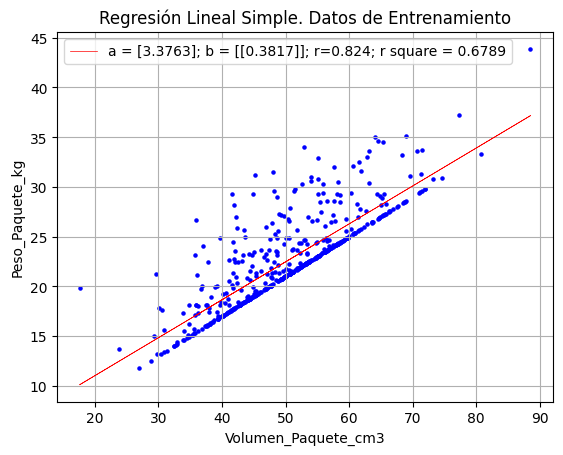

In [ ]:

f_regresion_linea_tendencia(modelo, v_independiente, v_dependiente, independiente, dependiente)





## Métricas de evaluación

El modelo se acepta si el valor de *r square* sobrepasa el $50$% tanto con los datos de entrenamiento como con los datos de validación.

El modelo a través de la métrica *root mean square error (RMSE)* que significa que tanto varía las predicciones con respecto a los datos reales se deberá comparar con otros modelos y los mismos datos para evalura su rendimiento.



## Métrica r square

In [ ]:
# Calcular el coeficiente de determinación R^2 o R square
score = modelo.score(ind_train.reshape(-1, 1), dep_train.reshape(-1, 1))
print("Coeficiente de determinación R^2:", score)

Coeficiente de determinación R^2: 0.7056013207022355


La métrica de *r square* está por encima del $50$% por lo que el modelo SI se acepta y significa que la variable volumen de un paquete representa o explica aproximadamente n $70.56$% a la variable peso del paquete.

## Predicciones

¿Cuál es la predicción para valores de acuerdo al modelo de regresión lineal simple?
$$
\text{Predicción Y} = 3.37633869 + 0.38170618] \cdot x_i
$$

Se utilizan los datos de validación de la variable pesos para hacer las predicciones



In [ ]:
predicciones = modelo.predict(ind_test.reshape(-1, 1))
print(predicciones)

[[25.60135228]
 [16.37561868]
 [25.71543823]
 [27.33861889]
 [27.6384995 ]
 [21.511336  ]
 [23.73011065]
 [18.37398472]
 [21.4975793 ]
 [19.33844865]
 [24.96775322]
 [18.333312  ]
 [18.77847509]
 [25.35310126]
 [24.66240108]
 [23.77325977]
 [21.2813648 ]
 [20.16489623]
 [21.56786964]
 [23.34739648]
 [19.43654692]
 [20.34833394]
 [24.9339147 ]
 [20.99176469]
 [23.45811164]
 [29.16189196]
 [20.61329617]
 [20.6839283 ]
 [22.17748288]
 [22.63559807]
 [20.4833781 ]
 [26.3970364 ]
 [18.81429065]
 [28.0098769 ]
 [24.54995204]
 [18.95214844]
 [23.61267237]
 [22.33684966]
 [27.96307671]
 [25.09596978]
 [20.75727238]
 [20.9649465 ]
 [25.35867993]
 [20.25957065]
 [21.56793231]
 [20.66366523]
 [24.35763614]
 [19.3231815 ]
 [25.95579397]
 [18.55149663]
 [26.96309774]
 [25.79134929]
 [20.3098761 ]
 [20.93016421]
 [25.18703153]
 [31.86399484]
 [22.71940687]
 [13.67507226]
 [23.31702238]
 [18.00073128]
 [21.43330501]
 [17.89565296]
 [20.17058264]
 [12.46191865]
 [21.15348506]
 [22.39098175]
 [21.93388


Crear un *data.frame* llamado comparaciones a partir de la creación de un diccionario con los valores reales del conjunto de validacinión y las predicciones calculadas.
Con la función flatten().tolist() convierte el arreglo a una lista de una dimensión.

In [ ]:

diccionario = {independiente: ind_test.flatten().tolist(),
                'Real' : dep_test.flatten().tolist(),
               'Predicho' : predicciones.flatten().tolist() }
# diccionario

comparaciones = pd.DataFrame(diccionario)
print (comparaciones)

    Volumen_Paquete_cm3       Real   Predicho
0             58.225449  24.290180  25.601352
1             34.055723  15.465656  16.375619
2             58.524333  28.481584  25.715438
3             62.776768  32.997974  27.338619
4             63.562400  26.424960  27.638500
..                  ...        ...        ...
95            59.178619  24.671448  25.965183
96            65.860168  28.245057  28.515572
97            53.142473  22.256989  23.661149
98            46.723379  20.357662  21.210941
99            58.254163  30.536555  25.612313

[100 rows x 3 columns]


¿Qué tanto se desvián las predicciones de los valores reales?

Error estándar médio MSE
$$
MSE = \frac{\sum(predicho_i - real_i)^{2}}{n}
$$

Raiz del error estándar medio *Root Mean Square Error*

$$
RMSE = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$

In [ ]:
print('Mean Absolute Error: MAE', metrics.mean_absolute_error(dep_test, predicciones))
print('Mean Squared Error: MSE', metrics.mean_squared_error(dep_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(dep_test, predicciones)))

cova, r, r_square =  f_cov_corr(ind_test, dep_test)
print ("r square = ", r_square)



Mean Absolute Error: MAE 2.2094387020952904
Mean Squared Error: MSE 9.332739081460014
Root Mean Squared Error RMSE: 3.0549532044632066
r square =  0.5808635460204756


# Interpretación

Se cargó un conjunto de datos con variables de interés volumen en centimetros cuadrados y pesos en kilogramos de paquetes de una empresa de paqueteía.

Se exploraron estadísticos de los datos observándose que existen algunos datos atípicos.

Se construyó un modelo de regresión lineal simple con datos de entrenamiento. La variable volumen de paquete fué la variable predictora o independiente y la variable peso del paquete fue la variable predictiva, objetivo o dependiente.

A partir del modelo de regresión lineal simple se extrajeron los coeficientes de la abcisa o intersección  a  y la pendiente  b  teniendo valores de  $a=3.37633869$  y  $b=0.38170618$ , que son los valores de los coeficientes que definen la recta de regresión o recta de estimación para cada valor de la variable independoiente.

* Coeficiente a : [3.37633869]
* Coeficiente b : [[0.38170618]]


Se visualizó la dispersión de los datos con los valores de entrenamiento y se estimó la recta de regresión presentada también visualmente.

Habiendo relizado una evaluación del modelo con datos de entrenamiento o datos que se utilizaron para construir el modelo con el estadístico *r square* o coeficiente de determinación se encontró que el valor del volumen representa aproximadamente un  $70.56$% al valor del peso del paquete.

Se utilizaron datos de prueba o datos de validación con las mismas variables de volumen y pesos para construir predicciones.

Habiendo relizado una evaluación del modelo con los datos de validación o datos de prueba con el estadístico *r square* o coeficiente de determinación se encontró que el valor del volumen representa aproximadamente un  $58$% al valor del peso del paquete.

El modelo se acepta datos que el valor de *r square* como métrica establecida inicialmente sobrepasa el  $50$% tanto con los datos de entrenamiento como con los datos de validación.

El valor de *RMSE* *root mean square error* o error cuadrático medio significa eu tanto el modelo es eficiente y su valor cercano a cero representa esa eficiencia. El valor fue de   $3.0549$  aproximadamente y debe ser comparado contra otro modelo para medir su eficiencia en relación con otros.

Las predicciones del modelo se desvenían promedio $3.0549$ unidades de los valores reales  de acuerdo a $RMSE$.

!Hasta la próxima!

